Имеем задание, как аналитики крупного интернет-магазина, проверить список гипотез, подготовленных вместе с отделом маркетинга  для увеличения выручки.

Поставлены задачи приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

Исследование разделено на два части.

Часть 1. Приоритизация гипотез.

В предоставленном для исследования файле 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. 

Описание данных, предоставленных для исследования:
Hypothesis — краткое описание гипотезы;
Reach — охват пользователей по 10-балльной шкале;
Impact — влияние на пользователей по 10-балльной шкале;
Confidence — уверенность в гипотезе по 10-балльной шкале;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Мы в ходе исследования выполним следующие задачи:

- применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

- применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

- укажим, как изменилась приоритизация гипотез при применении RICE вместо ICE.


Во второй части нашего исследования мы проведем анализ результатов А/В тестирования и рассмотрим следующие задачи:

- построим график кумулятивной выручки по группам;

- построим график кумулятивного среднего чека по группам;

- построим график относительного изменения кумулятивного среднего чека группы B к группе A;

- построим график кумулятивного среднего количества заказов на посетителя по группам;

- построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A;

- построим точечный график количества заказов по пользователям;

- посчитаем 95-й и 99-й перцентили количества заказов на пользователя;

- построим точечный график стоимостей заказов;

- посчитаем 95-й и 99-й перцентили стоимости заказов;

- посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным;

- посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным;

- посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным;

- посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным;

По окончанию исследования мы постараемся по результатам теста принять и объяснить решение о продолжении тестирования или его остановке, фиксируя победу одной из групп или константируя отсутствие различий между группами.


In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
pd.options.display.max_colwidth = 130
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# применим фреймворк ICE для приоритизации гипотез
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [5]:
# отсортируем по убыванию приоритета 
pd.options.display.max_colwidth = 130
hypothesis.sort_values(by='ICE', ascending =False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


In [6]:
# применим фреймворк RICE для приоритизации гипотез
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [7]:
# отсортируем по убыванию приоритета 
pd.options.display.max_colwidth = 130
hypothesis.sort_values(by='RICE', ascending =False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Как видим, при применении фреймворка ICE основную тройку лидеров-гипотез составили: 

- Запустить акцию, дающую скидку на товар в день рождения,

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, 

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. 

У гипотезы "Запустить акцию, дающую скидку на товар в день рождения" совершенно минимальный охват пользователей (1 из 10) и средний размер затрат ресуросов на проверку (5 из 10). Гипотеза "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" так же имеет малый охват пользователей (3 из 10) и чуть более среднего размера затрат ресурсов на проверку (6 из 10). У "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" максимальный охват (10 из 10) и средние затраты (5 из 10).

А при RICE мы видим изменение в лидерах: 

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,

- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа,

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

При этом мы видим, что у гипотезы "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" охват 8 по 10-бальной шкале и мнимальные затраты (3 из 10), но меньший размер влияния на пользователей, по сравнению с "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" гипотезами. 

Для дальнейшего исследования, я предположила бы к рассмотрению гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", учитывая высокий охват пользователей и низкий/средний размер затрат ресурсов.

Часть 2. Анализ A/B-теста

Во второй части нашего исследования будет поставлено и рассмотрено 13 задач.

Нам предоставлены для исследования два файла:
- orders.csv , в котором содержится информация о transactionId — идентификатор заказа, visitorId — идентификатор пользователя, совершившего заказ, date — дата, когда был совершён заказ, revenue — выручка заказа, group — группа A/B-теста, в которую попал заказ;
- visitors.csv, с данными о date — дата, group — группа A/B-теста, visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Нам предстоит трудоемкое исследование, каждый пункт будет описан в процессе, а по окончанию мы сформулируем выводы, по сложившимся у нас результатам.

Но первым нашим шагом будет изучение предоставлнных данных в файлах на корректность.

In [8]:
# загрузим и изучим файл orders.csv 
orders = pd.read_csv('/datasets/orders.csv')
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Данные представлены в 1197 строках, пропусков нет. Переименовывать столбцы не требуется. Изменим формат столбца data для дальнейших расчетов. 

In [9]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

In [10]:
# загрузим и изучим файл visitors.csv
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Данные представлены в 62 строках, пропусков нет. Так же не требуется изменять название столбцов, а вот формат столбца data приведем в соответствие.

In [11]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [12]:
print('Количество дубликатов в файле orders:', orders.duplicated().sum())
print('Количество дубликатов в файле visitors:', orders.duplicated().sum())

Количество дубликатов в файле orders: 0
Количество дубликатов в файле visitors: 0


In [13]:
# для исследования кумулятирных параметров, обьединим таблицы 
ordersAggregated = orders.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = visitors.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(10)


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,A,24,20,148579,719
2,2019-08-01,A,24,20,148579,719
3,2019-08-01,A,24,20,148579,719
4,2019-08-01,A,24,20,148579,719
5,2019-08-01,A,24,20,148579,719
6,2019-08-01,A,24,20,148579,719
7,2019-08-01,A,24,20,148579,719
8,2019-08-01,A,24,20,148579,719
9,2019-08-01,A,24,20,148579,719


In [14]:
# уберем дубликаты и отсортируем по дате
cumulativeData = cumulativeData.drop_duplicates().sort_values(by=['date'])
cumulativeData.head(10)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
24,2019-08-01,B,21,20,101217,713
45,2019-08-02,A,44,38,242401,1338
65,2019-08-02,B,45,43,266748,1294
89,2019-08-03,A,68,62,354874,1845
113,2019-08-03,B,61,59,380996,1803
129,2019-08-04,A,84,77,425699,2562
145,2019-08-04,B,78,75,489567,2573
162,2019-08-05,A,109,100,549917,3318
187,2019-08-05,B,101,98,581995,3280


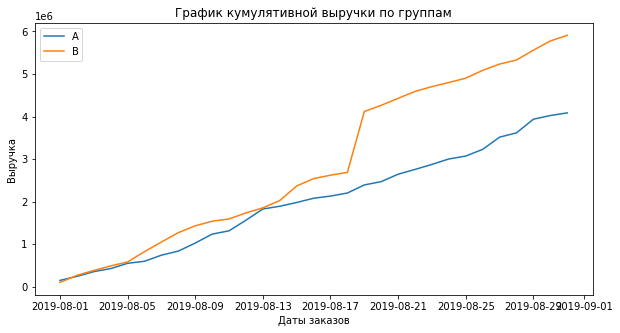

In [15]:
# Задание 1: постройте график кумулятивной выручки по группам

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(10,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel("Даты заказов")
plt.ylabel("Выручка")
plt.title ('График кумулятивной выручки по группам')
plt.legend() 

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако график выручки группы В резко растет 18 -19 августа. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке.

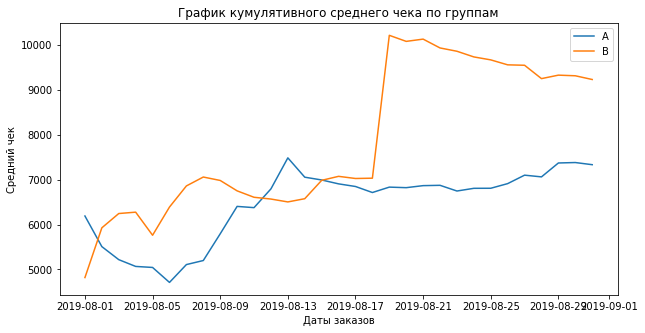

In [16]:
# Задание 2: постройте график кумулятивного среднего чека по группам
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel("Даты заказов")
plt.ylabel("Средний чек")
plt.title ('График кумулятивного среднего чека по группам')
plt.legend() 
 

Как видно на графиках, средний чек группы В практически всегда выше среднего чека группы А, за исключением периода +/- 13.08. Резкий скачек графика по группе В 18-19 августа подтверждает присутствие в данных аномально высокой покупки. Так же видим, что в конце исследуемого периода, стоимость среднего чека по группе В начинает снижаться, а по группе А - медленно расти. 

Text(0.5, 1.0, 'График относительного изменения кумулятивного среднего чека группы B к группе A')

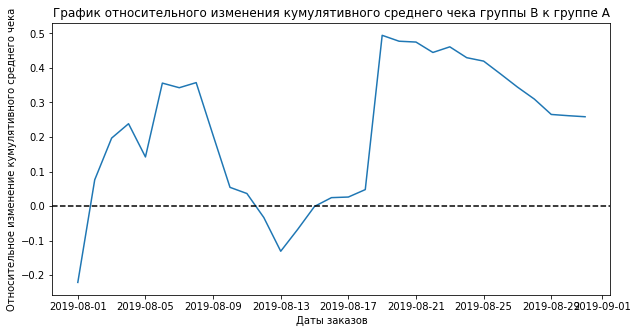

In [17]:
# Задание 3: Постройте график относительного изменения кумулятивного среднего чека группы B к группе A.

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel("Даты заказов")
plt.ylabel("Относительное изменение кумулятивного среднего чека")
plt.title ('График относительного изменения кумулятивного среднего чека группы B к группе A')

Колебания графика очень резкие. В дальнейшем исследовании, однозначно, необходимо убрать аномальные данные.

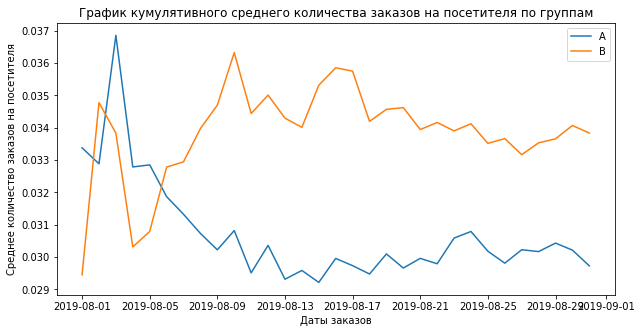

In [18]:
# Задание 4: Постройте график кумулятивного среднего количества заказов на посетителя по группам.

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(10,5))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xlabel("Даты заказов")
plt.ylabel("Среднее количество заказов на посетителя")
plt.title ('График кумулятивного среднего количества заказов на посетителя по группам')
plt.legend()

За исключением пары дней в начале периода нашего исследования, конверсия группы В выше конверсии группы А. При этом в конце периода мы видим тенденцию на спад у обеих групп. Графики не плавные, что еще раз подтверждает наличие выбросов.

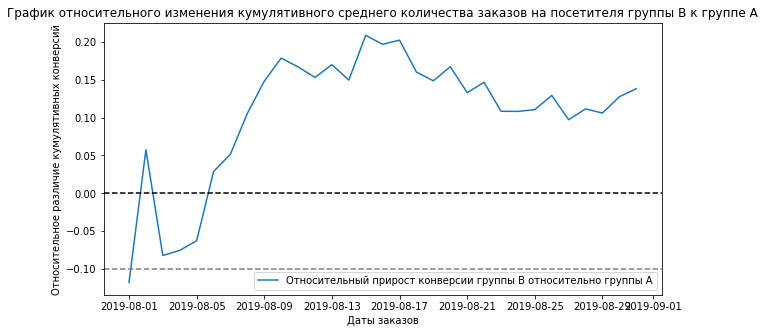

In [19]:
# Задание 5: постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.xlabel("Даты заказов")
plt.ylabel("Относительное различие кумулятивных конверсий")
plt.title ('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

Так же видим, что в начале исследуемого периода конверсия В уступает группе А, но в дальнейшем показывает резкий рост и, можно все же сказать, что стабилизируется.

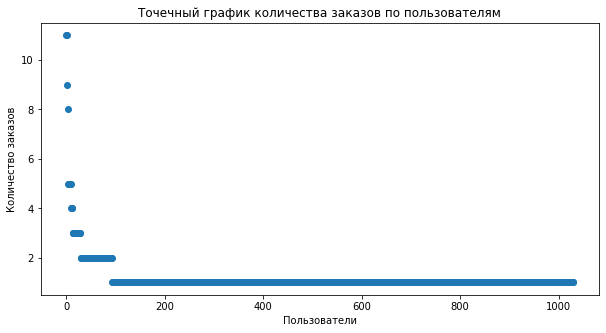

In [20]:
# Задание 6: постройте точечный график количества заказов по пользователям

ordersByUsers = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'}).sort_values(by='transactionId', ascending = False)
ordersByUsers.columns = ['visitorId', 'orders']
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10,5))
plt.xlabel("Пользователи")
plt.ylabel("Количество заказов")
plt.title ('Точечный график количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders'])


В овсновном пользователи совершили 1 покупку. Более 2 покупок - уже редкое явление. В "цифрах" это нам покажет подсчет перцентилей.

In [21]:
# Задание 7: посчитайте 95-й и 99-й перцентили количества заказов на пользователя

print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Так и получаем, что 5% покупателей совершали 2 и более покупок и уже только 1% совершили 4 и более. 

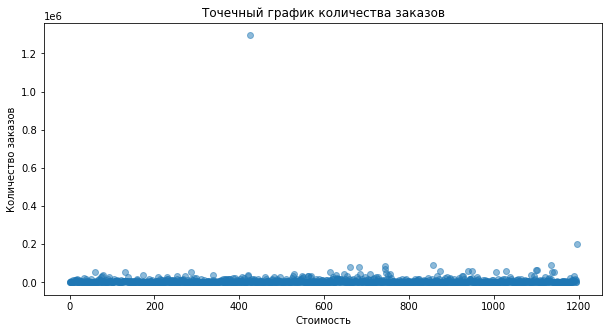

In [22]:
# Задание 8: постройте точечный график стоимостей заказов

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.xlabel("Стоимость")
plt.ylabel("Количество заказов")
plt.title ("Точечный график количества заказов")
plt.scatter(x_values, orders['revenue'], alpha=0.5);


Отчетливо видим выбросы. Размер покупок определим с помощью перцентилей.

<Figure size 720x360 with 0 Axes>

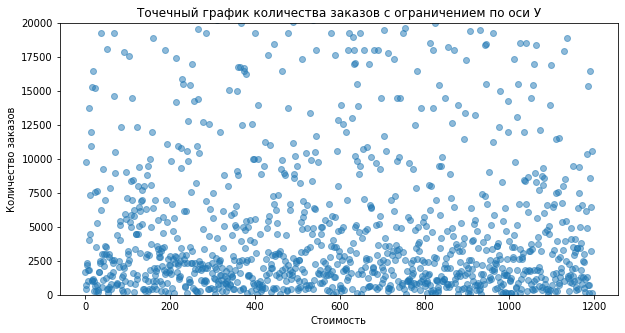

In [23]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.figure(figsize=(10,5))
plt.xlabel("Стоимость")
plt.ylabel("Количество заказов")
plt.title ("Точечный график количества заказов с ограничением по оси У")
plt.ylim(0, 20000)
plt.scatter(x_values, orders['revenue'], alpha=0.5);

In [24]:
# Задание 9: посчитайте 95-й и 99-й перцентили стоимости заказов

print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


5% покупалетей не купили болше, чем на 28000, а 1% остановились на 58233,2

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [25]:
# Задание 10: посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId' : pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId' : pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))


        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [31]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transactionId']

sampleA = pd.concat(
    [
        ordersByUsersA['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value =", "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('различие в средних =', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 

p-value = 0.017
различие в средних = 0.138


В результате имеем, что p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. А значит: по «сырым» данным различия в конверсии групп A и B есть. А относительный выигрыш группы "B" над "A" равен 13.8% .

Теперь проверим статистическую значимость различий в среднем чеке между сегментами.

Нулевая гипотеза: различий в среднем чеке между группами нет.

Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [32]:
# Задание 11: посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

print('p-value=','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('различие в средних =', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value= 0.729
различие в средних = 0.259


P-value равен 0.729, а это больше 0.05. Значит, нулевая гипотеза не отвеергается и в среднем чеке нет различий.Средние чеки по "сырым" данным схожи. И при этом, средний чек группы B значительно выше среднего чека группы A, аж на 25.9%.

In [33]:
# Задание 12: посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58300]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print("Количество аномальных пользователей:", abnormalUsers.shape[0]) 

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
Name: visitorId, dtype: int64
Количество аномальных пользователей: 31


Всего 31 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [34]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 





Применим статистический критерий Манна-Уитни к полученным выборкам и свормулируем гипотезы. 

Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [35]:
print("p-value =",'{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('различие в средних =','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.010
различие в средних = 0.174


P-value равен 0.010 - это меньше 0,05, а значит, нулевую гипотезу о том, что статистическая значимость различий в среднем количестве заказов между группами теста по очищенным данным нет, - отвергаем. А значит по «очищенным» данным различие в конверсии групп A и B тоже есть. А превосходство группы "B" над "A" = 17.4% - выше, чем по "сырым" 13,8%.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по "очищенным" данным и определим следующие гипотезы:

Нулевая гипотеза: статистически значимых различий в средних чеках между группами нет. 

Альтернативная гипотеза: статистически значимые различия есть.

In [36]:
# Задание 13: Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

print("p-value =",
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('различие в средних =',
        "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.798
различие в средних = -0.020


P-value выше 0.05, а следовательно, нулевая гипотеза не отвергается. Средний чек по группе В остался выше среднего чека по группе А, но уже без высокой разницы в четверть, а всего на 2%.

Задание 14: Примите решение по результатам теста и объясните его. Варианты решений:

1. Остановить тест, зафиксировать победу одной из групп.

2. Остановить тест, зафиксировать отсутствие различий между группами.

3. Продолжить тест.

Согласно полученным результатам исследования, мы можем принять решение остановить тест и признать победу группы В.

Это обусловлено подтвержденным различием по среднему количеству заказов в группе А и группе В. По "очищенным" данным даже процентный выигрыш стал больше, чем по "сырым" (был 13,8%, стал 17,4%). Хоть и после очищения данных от выбросов средний чек группы В перестал быть существенно выше, чем по группе А, но, что не маловажно, не стал ниже).

#САМЫЙ ГЛАВНЫЙ ИТОГО:)

Как аналитики крупного интернет-магазина, мы провели исследование, состоящее из двух блоков заданий.

В первой части исследованя нам был предоставлен файл с 9 гипотезами по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort, где
Hypothesis — краткое описание гипотезы;
Reach — охват пользователей по 10-балльной шкале;
Impact — влияние на пользователей по 10-балльной шкале;
Confidence — уверенность в гипотезе по 10-балльной шкале;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Мы применили фреймворк ICE для приоритизации гипотез и получили тройку-лидеров:

- Запустить акцию, дающую скидку на товар в день рождения,

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, 

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. 

У гипотезы "Запустить акцию, дающую скидку на товар в день рождения" совершенно минимальный охват пользователей (1 из 10) и средний размер затрат ресуросов на проверку (5 из 10). Гипотеза "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" так же имеет малый охват пользователей (3 из 10) и чуть более среднего размера затрат ресурсов на проверку (6 из 10). У "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" максимальный охват (10 из 10) и средние затраты (5 из 10).

А при RICE мы получили гипотезы-лидеры: 

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,

- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа,

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

При этом мы увидели, что у гипотезы "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" охват 8 по 10-бальной шкале и мнимальные затраты (3 из 10), но меньший размер влияния на пользователей, по сравнению с "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" гипотезами. 

Для дальнейшего исследования, предлагаем к рассмотрению гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", учитывая высокий охват пользователей и низкий/средний размер затрат ресурсов.



Во второй части нашего исследования мы провели анализ результатов А/В тестирования, предоставленные в двух файлах, и рассмотрели следующие задачи:

- построили график кумулятивной выручки по группам, который нам показал, что выручка почти равномерно увеличивается в течение всего теста. Хороший знак. Однако график выручки группы В резко растет 18 -19 августа. Это сигнализирует о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке.;

- построили график кумулятивного среднего чека по группам, который нам показал, что средний чек группы В практически всегда выше среднего чека группы А, за исключением периода +/- 13.08. Резкий скачек графика по группе В 18-19 августа подтверждает присутствие в данных аномально высокой покупки. Так же увидели, что в конце исследуемого периода, стоимость среднего чека по группе В начинает снижаться, а по группе А - медленно расти;

- построили график относительного изменения кумулятивного среднего чека группы B к группе A, который выглядит "резким" и только подтверждает присутствие аномальных значений в данных;

- построили график кумулятивного среднего количества заказов на посетителя по группам, который указал нам, что за исключением пары дней в начале периода нашего исследования, конверсия группы В выше конверсии группы А. При этом в конце периода мы увидили тенденцию на спад у обеих групп. Графики не плавные, что еще раз подтверждает наличие выбросов;

- построили график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A, в котором мы увидели, что в начале исследуемого периода конверсия В уступает группе А, но в дальнейшем показывает резкий рост и, можно все же сказать, что стабилизируется;

- построили точечный график количества заказов по пользователям, в котором мы увидели, что в основном пользователи совершили 1 покупку. Более 2 покупок - уже редкое явление;

- посчитали 95-й и 99-й перцентили количества заказов на пользователя, котрые подтвердиди наши выводы по графику количества заказов по пользователям и, действительно, лишь 5% покупателей совершали 2 и более покупок и только 1% совершили 4 и более;

- построили точечный график стоимостей заказов, который показал нам присутсвие выбросов в данных и что основной размер покупки не превышал 100000;

- посчитали 95-й и 99-й перцентили стоимости заказов и убедились в правильности наших выводов по графику стоимостей заказов, но получили точные цифры: 5% покупалетей не купили болше, чем на 28000, а 1% остановились на 58233,2;

- посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным, без удаления аномальных пользователей, сформулировав гипотезы:

нулевую: различий в среднем количестве заказов между группами нет. 

альтернативную: различия в среднем между группами есть.

В результате получили, что p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергли. А значит: по «сырым» данным различия в конверсии групп A и B есть. А относительный выигрыш группы "B" над "A" получили равным 13.8%.

- посчитали статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным, выдвинув гипотезы:

Нулевая гипотеза: различий в среднем чеке между группами нет.

Альтернативная гипотеза: различия в среднем чеке между группами есть.

Получили P-value равный 0.729, а это больше 0.05. Значит, нулевая гипотеза не отвеергается и в среднем чеке нет различий.Средние чеки по "сырым" данным схожи. И при этом, средний чек группы B значительно выше среднего чека группы A, аж на 25.9%, что в дальнейшем исследовании нами подьвердиться, как аномально высокий процент, возникший из-за выбросов данных;

- посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным, исключив из исследования 31 покупателя, ограничив данные 2 покупками и размером покупки свыше 58300.

Применили статистический критерий Манна-Уитни к полученным выборкам и свормулировали гипотезы:

Нулевую: различий в среднем количестве заказов между группами нет. Альтернативную: различия в среднем между группами есть.

Получили P-value равный 0.010 - это меньше 0,05, а значит, нулевую гипотезу о том, что статистическая значимость различий в среднем количестве заказов между группами теста по очищенным данным нет, - отвергли. А значит по «очищенным» данным различие в конверсии групп A и B тоже есть. А превосходство группы "B" над "A" = 17.4% - выше, чем по "сырым" 13,8%;

- посчитали статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным, лпределив гипотезы:

Нулевую гипотезу: статистически значимых различий в средних чеках между группами нет. 

Альтернативую гипотезу: статистически значимые различия есть.

Получили P-value выше 0.05, а следовательно, нулевая гипотеза не отвергается. Средний чек по группе В остался выше среднего чека по группе А, но уже без высокой разницы в четверть, а всего на 2%;


Согласно полученным результатам исследования, мы можем принять решение остановить тест и признать победу группы В.

Это обусловлено подтвержденным различием по среднему количеству заказов в группе А и группе В. По "очищенным" данным даже процентный выигрыш стал больше, чем по "сырым" (был 13,8%, стал 17,4%). Хоть и после очищения данных от выбросов средний чек группы В перестал быть существенно выше, чем по группе А, но, что не маловажно, не стал ниже).



